In [1]:
# 필요한 라이브러리 import
import numpy as np
import torch
import torch.nn as nn           # PyTorch에서 신경망을 구축하는 데 사용되는 모듈의 집합을 제공하는 패키지
import matplotlib.pyplot as plt # 시각화

1. Module 클래스   
torch.nn.Module : 모든 신경망 모듈의 기본 클래스로 사용자가 정의한 신경망 모델은 이 클래스를 상속받아야 한다

2. 레이어 (Layers)
torch.nn.Linear() : fully connected layer를 나타냄   
torch.nn.Conv2d() : 합성곱 레이어를 나타냄   

3. 손실 함수 (Loss Functions)   
torch.nn.MSELoss() : Mean Squared Error Loss   
torch.nn.CrossEntropyLoss() : Cross-Entropy Loss

4. 가중치 초기화 (Initialization)   
torch.nn.init.xavier_uniform_(module.weight) : 가중치를 균등하게 분포, 주로 tanh 활성화 함수를 사용   
torch.nn.init.normal_ : 가중치를 정규 분포로 초기화, 주로 ReLU 활성화 함수와 함께 사용

5. 활성화 함수 (Activiation Function)
torch.nn.ReLU() : 음수 입력을 0으로 변환하고 양수 입력을 그대로 반환하는 간단한 비선형 활성화 함수         
torch.nn.Sigmoid() : 0과 1 사이의 값으로 압축, 이진 분류 문제에서 출력을 확률로 해석   
torch.nn.Tanh() : Sigmoid와 유사하지만 [-1, 1] 사이의 값으로 변환   
torch.nn.Softmax(dim=1) : 다중 클래스 분류 문제에서 사용되며, 입력 벡터를 확률 분포로 변환(dim은 적용할 차원 설정)   

- cf) 최적화 (Optimizers)   
torch.optim.SGD(model.parameters(), lr=0.01) : 확률적 경사하강법   
torch.optim.Adam(model.parameters(), lr=0.001) : 아담 옵티마이저


In [2]:
x = torch.tensor([[0.,0.],[0.,1.], [1.,0.], [1.,1.]])
y = torch.tensor([0.,1.,1.,0.]).view(-1,1) # 4행 1열로 reshape

In [3]:
x, y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [4]:
class XORnet(nn.Module):
  def __init__(self):
    super(XORnet, self).__init__() # 상위 클래스, 즉 nn.Module을 상속 받는다
    self.layer1 = nn.Sequential(
        nn.Linear(2, 1),  # input이 2, output이 1
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2, 3),  # input이 2, hidden layer가 3
        nn.Sigmoid(),
        nn.Linear(3, 1),  # input이 3, output이 1
        nn.Sigmoid()
    )

  def forward(self, input, num_layer):
    if num_layer == 1:
      out = self.layer1(input)
    elif num_layer == 2:
      out = self.layer2(input)
    else:
      print("Out of range")
      raise
    return out

In [5]:
model = XORnet() # 설계한 모델의 객체를 생성

In [6]:
print(model) # 모델과 파라미터들의 정보를 확인 가능

XORnet(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [7]:
# Hyper-Parameter
learning_rate = 0.05  # step size 설정
epochs = 10000        # 학습 횟수 설정

# Cost function
criterion = nn.MSELoss() # cost function으로 MSE를 사용

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # 확률적 경사하강법(SGD)를 최적화 모델로 사용

In [8]:
error1 = []
error2 = []

for epoch in range(epochs): # 각 학습에 대해
  for i, (input, ans) in enumerate(zip(x, y)): # zip으로 x와 y에서 동일한 인덱스 위치의 값을 묶어서 함께 사용

    # 서로 다른 layer 개수에 따라 모델을 통해 예측값(output)을 산출
    output1 = model(input, 1) # 1 layer output
    output2 = model(input, 2) # 2 layer output

    # 예측값(output)과 실제값(ans)을 cost function에 넣어서 loss 계산
    loss1 = criterion(output1, ans)
    loss2 = criterion(output2, ans)

    # gradient를 초기화
    optimizer.zero_grad()

    # 각각의 손실에 대한 역전파(propagation)을 수행하여 gradient 계산
    loss1.backward()
    loss2.backward()

    # optimizer을 사용하여 gradient를 업데이트
    optimizer.step()

    # detach는 gradient 계산을 중지하고 텐서를 복사하는데 사용
    error1.append(loss1.detach().numpy())
    error2.append(loss2.detach().numpy())

  if epoch % 500 == 0 or (epoch+1)==epochs:
    print('Epoch [{}/{}] Loss1: {:.4f} Loss2: {:.4f}'.format(epoch+1, epochs, loss1, loss2))


Epoch [1/10000] Loss1: 0.0911 Loss2: 0.2179
Epoch [501/10000] Loss1: 0.2538 Loss2: 0.2514
Epoch [1001/10000] Loss1: 0.2532 Loss2: 0.2595
Epoch [1501/10000] Loss1: 0.2532 Loss2: 0.2760
Epoch [2001/10000] Loss1: 0.2532 Loss2: 0.3062
Epoch [2501/10000] Loss1: 0.2532 Loss2: 0.3339
Epoch [3001/10000] Loss1: 0.2532 Loss2: 0.2882
Epoch [3501/10000] Loss1: 0.2532 Loss2: 0.1731
Epoch [4001/10000] Loss1: 0.2532 Loss2: 0.0830
Epoch [4501/10000] Loss1: 0.2532 Loss2: 0.0439
Epoch [5001/10000] Loss1: 0.2532 Loss2: 0.0272
Epoch [5501/10000] Loss1: 0.2532 Loss2: 0.0188
Epoch [6001/10000] Loss1: 0.2532 Loss2: 0.0141
Epoch [6501/10000] Loss1: 0.2532 Loss2: 0.0111
Epoch [7001/10000] Loss1: 0.2532 Loss2: 0.0091
Epoch [7501/10000] Loss1: 0.2532 Loss2: 0.0076
Epoch [8001/10000] Loss1: 0.2532 Loss2: 0.0066
Epoch [8501/10000] Loss1: 0.2532 Loss2: 0.0057
Epoch [9001/10000] Loss1: 0.2532 Loss2: 0.0051
Epoch [9501/10000] Loss1: 0.2532 Loss2: 0.0045
Epoch [10000/10000] Loss1: 0.2532 Loss2: 0.0041


1개의 layer를 사용하는 경우에는 loss가 줄어들지 않지만   
2개의 layer를 사용하는 경우에는 epoch이 늘어남에 따라 loss가 줄어드는 것을 확인할 수 있다   
이는 XOR의 연산은 1개의 선으로 분류해낼 수 없기 때문이다.(적어도 2개의 선으로 구분해야 XOR 연산이 가능하다)   

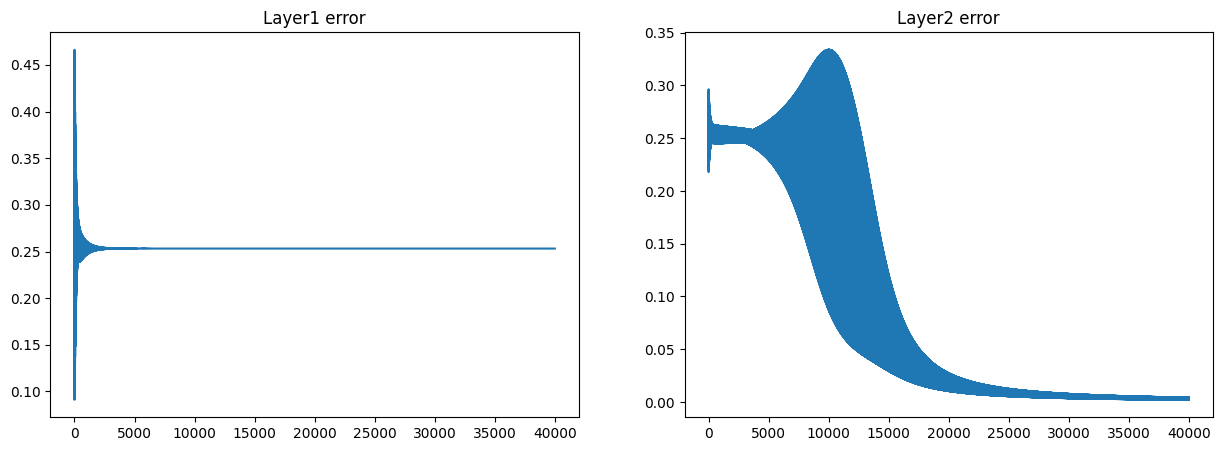

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(error1)
plt.title("Layer1 error")

plt.subplot(1,2,2)
plt.plot(error2)
plt.title("Layer2 error")
plt.show()

In [19]:
# Test after train (Sigmoid, MSELoss)
for input, target in zip (x, y):
  output1 = model(input,1)
  output2 = model(input,2)
  print("input: ",input, "layer1: ", output1.data, "\tlayer2: ", output2.data, "\tanswer:", target)

input:  tensor([0., 0.]) layer1:  tensor([0.5031]) 	layer2:  tensor([0.0454]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5000]) 	layer2:  tensor([0.9475]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4969]) 	layer2:  tensor([0.9513]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4937]) 	layer2:  tensor([0.0641]) 	answer: tensor([0.])


1. 테스트 결과를 보면, 우선 output은 sigmoid 활성화 함수를 거쳐서 나오기 때문에 0에서 1 사이의 값으로 나온다    

2. layer1의 경우 0.5로 loss가 유지되어 학습이 되지 않은 것을 확인할 수 있다   

3. layer2의 경우 실제값(ans)가 1인 경우 1에 가까운 출력(output2, 예측값)이 나오고 반대로 실제값이 0인 경우 0에 가까운 출력이 나오는 것을 확인할 수 있다. 즉, 학습이 된 것이다

In [17]:
torch.save(model.state_dict(), 'my_model.pth') # pth파일은 모델의 구조와 필요한 파라미터들이 저장된다
                                               # 모델의 학습된 정보를 load해서 나중에 사용할 수 있다

In [18]:
import os
!ls # my_model.pth가 저장된 것을 확인할 수 있다

my_model.pth  sample_data
